In [210]:
import librosa
import numpy as np
import math
import librosa.display as display
import matplotlib.pyplot as plt
from collections import Counter
import soundfile as sf
import IPython.display as ipd

In [239]:
#audio_path = 'data/Vibe - Odhora (with lyrics).wav'
audio_path = 'data/Spiritbox - The Mara Effect live at Silverside Sound.wav'
#audio_path = 'data/Arnob-She je boshe ache.wav'

In [240]:
y, sr = librosa.load(audio_path)

In [241]:
tempo, beat_frames = librosa.beat.beat_track(y=y, sr=sr)

In [242]:
# Compute the chroma features
chroma = librosa.feature.chroma_cqt(y=y, sr=sr)

In [243]:
# Compute the tonality
tonality = librosa.feature.tonnetz(y=y, sr=sr)

In [244]:
print(tempo)
#print(beat_frames)

107.666015625


In [245]:
def return_key_name(key):
    if key == 0:
        return "C"
    elif key == 1:
        return "C#/Db"
    elif key == 2:
        return "D"
    elif key == 3:
        return "D#/Eb"
    elif key == 4:
        return "E"
    elif key == 5:
        return "F"
    elif key == 6:
        return "F#/Gb"
    elif key == 7:
        return "G"
    elif key == 8:
        return "G#/Ab"
    elif key == 9:
        return "A"
    elif key == 10:
        return "A#/Bb"
    else :
        return "B"

In [246]:
# Compute the key
key = np.argmax(np.mean(chroma, axis=1))
key_name = return_key_name(key)
print("Key: ",key_name,"-",key)

Key:  F#/Gb - 6


In [247]:
# Compute the mode
mode = 1 if np.mean(chroma[5:7]) > np.mean(chroma[-5:-3]) else 0

print("Mode: ","In Major Key -" if mode==0 else "In Minor Key -",mode)

Mode:  In Major Key - 0


In [248]:
## this function return an integer from [0,6] which corresponds mode type
def return_mode_type_value():
    ionian = [1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1]
    dorian = [1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0]
    phrygian = [1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0]
    lydian = [1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1]
    mixolydian = [1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0]
    aeolian = [1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0]
    locrian = [1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0]
    
    chroma_mean = np.mean(chroma, axis=1)
    
    # Compute the correlation between the chroma features and each reference pattern
    corr_ionian = np.corrcoef(chroma_mean, ionian)[0, 1]
    corr_dorian = np.corrcoef(chroma_mean, dorian)[0, 1]
    corr_phrygian = np.corrcoef(chroma_mean, phrygian)[0, 1]
    corr_lydian = np.corrcoef(chroma_mean, lydian)[0, 1]
    corr_mixolydian = np.corrcoef(chroma_mean, mixolydian)[0, 1]
    corr_aeolian = np.corrcoef(chroma_mean, aeolian)[0, 1]
    corr_locrian = np.corrcoef(chroma_mean, locrian)[0, 1]

    # Determine the mode with the highest correlation
    mode_type = np.argmax([corr_ionian, corr_dorian, corr_phrygian, corr_lydian, corr_mixolydian, corr_aeolian, corr_locrian]) 
    return mode_type

In [249]:
def return_mode_type_name(mode_type_value):
    if mode_type_value == 0:
        return "ionian"
    elif mode_type_value == 1:
        return "dorian"
    elif mode_type_value == 2:
        return "phrygian"
    elif mode_type_value == 3:
        return "lydian"
    elif mode_type_value == 4:
        return "mixolydian"
    elif mode_type_value == 5:
        return "aeolian"
    else :
        return "locrian"

In [250]:
# Compute Mode Type
mode_type_value = return_mode_type_value()
mode_type_name  = return_mode_type_name(mode_type_value)

print("Mode Type:",mode_type_name,"-",mode_type_value)

Mode Type: lydian - 3


In [251]:
# Compute the tuning
tuning = librosa.estimate_tuning(y=y,sr=sr)
print(tuning)

0.050000000000000044


In [252]:
# Compute the timbre (Timbre)
timbre = librosa.feature.spectral_centroid(y=y, sr=sr)
print("Timbre :",timbre,np.mean(timbre))

Timbre : [[   0.            0.            0.         ... 2216.88827378
  2854.30025213 4261.87464041]] 2402.7417296333533


In [253]:
# Compute the dynamics (Dynamics)
dynamics = librosa.feature.rms(y=y)
print("Dynamics:",np.max(dynamics),np.min(dynamics),np.mean(dynamics))

Dynamics: 0.43946177 0.0 0.2157591


In [258]:
# Compute the musical motif (Musical motif)
motif_matrix = librosa.feature.tempogram(y=y, sr=sr)
motif = (np.mean(motif_matrix, axis=1))
print(motif)

[1.00000000e+00 8.60468914e-01 7.58629690e-01 7.49409391e-01
 7.59071566e-01 7.79120596e-01 7.97176486e-01 7.78622997e-01
 7.61206637e-01 7.58132737e-01 7.70530696e-01 7.93205478e-01
 8.13831127e-01 7.93391434e-01 7.67923143e-01 7.52944016e-01
 7.52902884e-01 7.64251398e-01 7.83247087e-01 7.79380175e-01
 7.69062391e-01 7.58427263e-01 7.60911822e-01 7.74827646e-01
 7.95015684e-01 7.82740708e-01 7.57697146e-01 7.39656670e-01
 7.39497517e-01 7.49765850e-01 7.61551846e-01 7.54084799e-01
 7.41118598e-01 7.30156588e-01 7.35464583e-01 7.49644095e-01
 7.60942739e-01 7.51933915e-01 7.35131309e-01 7.25585555e-01
 7.26955502e-01 7.24420664e-01 7.27294925e-01 7.23773439e-01
 7.13671554e-01 7.01944111e-01 7.06817617e-01 7.14893999e-01
 7.19992364e-01 7.18022703e-01 7.06217553e-01 6.86917123e-01
 6.83916663e-01 6.85266381e-01 6.84602655e-01 6.78150452e-01
 6.71308719e-01 6.63949364e-01 6.70423681e-01 6.75846848e-01
 6.76791674e-01 6.75250564e-01 6.68427038e-01 6.50609679e-01
 6.44753785e-01 6.409320

In [264]:
# Compute the texture (Texture)
texture_matrix = librosa.feature.melspectrogram(y=y, sr=sr)
#texture_matrix = librosa.feature.spectral_contrast(y=y, sr=sr)
texture = (np.mean(texture_matrix, axis=1))
print(texture)

[2.04480114e+01 1.61325150e+02 2.18422577e+02 2.07964493e+02
 1.05280365e+02 5.17097168e+01 6.49968567e+01 8.38005981e+01
 3.98181381e+01 3.73064461e+01 3.42381020e+01 2.70365143e+01
 1.77504330e+01 1.13334227e+01 7.96545506e+00 1.18824978e+01
 1.08139248e+01 1.06248455e+01 1.54022007e+01 1.09759855e+01
 1.36090736e+01 1.56039934e+01 6.49716091e+00 1.00359297e+01
 1.38147221e+01 1.43517389e+01 4.34838295e+00 8.20730686e+00
 1.17138367e+01 4.75940514e+00 4.32210255e+00 1.20749388e+01
 1.09399643e+01 1.47465219e+01 8.05916977e+00 7.71892595e+00
 6.30876684e+00 1.25320101e+01 9.49266529e+00 5.16172314e+00
 3.81368876e+00 6.39510775e+00 9.43125629e+00 4.17603493e+00
 4.11551809e+00 3.62697220e+00 7.51996708e+00 4.58921957e+00
 8.78476810e+00 5.06482077e+00 4.06783772e+00 3.21464372e+00
 4.85403156e+00 4.86253881e+00 2.37695932e+00 2.04476166e+00
 2.80245876e+00 3.63544226e+00 2.21828890e+00 3.60680604e+00
 1.81154275e+00 2.08639383e+00 1.90310526e+00 2.14166713e+00
 1.99122214e+00 1.612952

In [263]:
####### don't need this feature ########
# Compute the melody (Pitch)
pitch_matrix, pitch_confidence = librosa.piptrack(y=y, sr=sr)
pitch = (np.mean(pitch_matrix, axis=1))
print(pitch)

[0. 0. 0. ... 0. 0. 0.]


In [233]:
####### don't need this feature ########
notes = librosa.key_to_notes('G:maj')
print("Notes Corresponding to Key",notes)

Notes Corresponding to Key ['C', 'C♯', 'D', 'D♯', 'E', 'F', 'F♯', 'G', 'G♯', 'A', 'A♯', 'B']


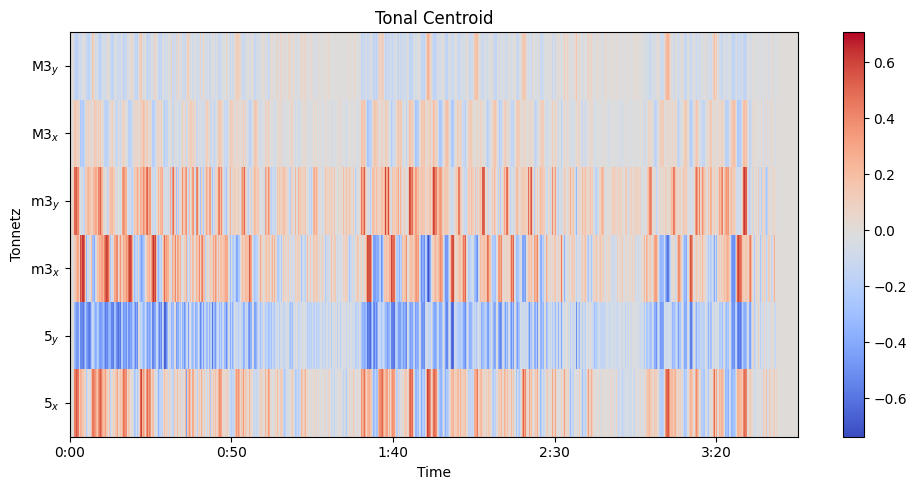

In [234]:
####### don't need this feature ########
plt.figure(figsize=(10, 5))
librosa.display.specshow(tonality, y_axis='tonnetz', x_axis='time')
plt.colorbar()
plt.title('Tonal Centroid')
plt.tight_layout()
plt.show()